# Tugas Akhir 3 - Data Preparation
Kelompok 1 :
- Daffa Tama Ramadani
- Erdiansyah
- Ainun

Pada modul kali ini kita akan melakukan data preparation untuk forecasting jumlah tamu hotel

## Import library yang dibutuhkan

In [30]:
# Import library yang dibutuhkan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

## Tentang Dataset Tamu
Dataset tamu ini merupakan dataset yang didapatkan dari Badan Pusat Statistika(BPS). Dataset ini berisi data jumlah tamu hotel yang telah dikelompokan per-provinsi. Dataset ini merupakan dataset timeseries dari tahun 2008-2021 yang dibagi menjadi 14 sheets.

Pada penelitian kali ini kita akan melakukan prediksi(forecasting) jumlah tamu berdasarkan data historical yang ada

## Membaca Dataset

In [31]:
# baca semua data

tm2008 = pd.read_excel('data/TamuHotelBintang.xlsx', sheet_name=0, header=0)
tm2009 = pd.read_excel('data/TamuHotelBintang.xlsx', sheet_name=1, header=0)
tm2010 = pd.read_excel('data/TamuHotelBintang.xlsx', sheet_name=2, header=0)
tm2011 = pd.read_excel('data/TamuHotelBintang.xlsx', sheet_name=3, header=0)
tm2012 = pd.read_excel('data/TamuHotelBintang.xlsx', sheet_name=4, header=0)
tm2013 = pd.read_excel('data/TamuHotelBintang.xlsx', sheet_name=5, header=0)
tm2014 = pd.read_excel('data/TamuHotelBintang.xlsx', sheet_name=6, header=0)
tm2015 = pd.read_excel('data/TamuHotelBintang.xlsx', sheet_name=7, header=0)
tm2016 = pd.read_excel('data/TamuHotelBintang.xlsx', sheet_name=8, header=0)
tm2017 = pd.read_excel('data/TamuHotelBintang.xlsx', sheet_name=9, header=0)
tm2018 = pd.read_excel('data/TamuHotelBintang.xlsx', sheet_name=10, header=0)
tm2019 = pd.read_excel('data/TamuHotelBintang.xlsx', sheet_name=11, header=0)
tm2020 = pd.read_excel('data/TamuHotelBintang.xlsx', sheet_name=12, header=0)
tm2021 = pd.read_excel('data/TamuHotelBintang.xlsx', sheet_name=13, header=0)

print('Data telah terbaca')

Data telah terbaca


setalah data telah di load ke dataframe, selanjutnya kita akan melihat sample data

In [32]:
tm2021

,Provinsi,Tingkat Penghunian Kamar pada Hotel Bintang,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahunan
2,ACEH,20.13,17.65,33.42,26.45,26.08,28.09,26.88,25.41,28.35,-,-,-,-
3,SUMATERA UTARA,37.63,36.58,37.67,36.96,33.91,39.10,29.87,27.43,37.07,-,-,-,-
4,SUMATERA BARAT,37.27,36.04,42.02,35.23,32.21,49.72,28.13,34.20,45.88,-,-,-,-
5,RIAU,36.69,38.16,38.69,34.53,31.54,33.40,34.42,30.49,39.63,-,-,-,-
6,JAMBI,26.50,38.42,41.57,38.96,33.67,45.13,28.78,32.20,41.79,-,-,-,-
7,SUMATERA SELATAN,45.85,46.11,48.24,44.41,43.55,53.42,41.70,42.27,45.21,-,-,-,-
8,BENGKULU,31.96,37.65,36.73,33.37,33.25,45.54,24.61,32.00,56.58,-,-,-,-
9,LAMPUNG,37.63,40.52,43.98,40.78,34.29,49.65,24.65,32.76,46.71,-,-,-,-


Terlihat bahwa dataframe sangat kotor. Banyak data yang kosong dan data yang tidak dibutuhkan. Kita akan melakukan data preparation untuk membersihkan dataframe

## Data Preparation

Selanjutnya kita akan mengubah format dataset

In [33]:
# fungsi formating dataset

def dataset_form(data):
    data.set_index('Provinsi', inplace=True)
    tahun = data.iloc[0, 0]
    data = data.iloc[2:, 0:12]
    data.columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
    data = data.add_prefix('{0}-'.format(tahun))
    data.replace('-', np.nan, inplace=True)
    
    return data

In [34]:
# formating dataset

tm2008 = dataset_form(tm2008)
tm2009 = dataset_form(tm2009)
tm2010 = dataset_form(tm2010)
tm2011 = dataset_form(tm2011)
tm2012 = dataset_form(tm2012)
tm2013 = dataset_form(tm2013)
tm2014 = dataset_form(tm2014)
tm2015 = dataset_form(tm2015)
tm2016 = dataset_form(tm2016)
tm2017 = dataset_form(tm2017)
tm2018 = dataset_form(tm2018)
tm2019 = dataset_form(tm2019)
tm2020 = dataset_form(tm2020)
tm2021 = dataset_form(tm2021)

print('Formating dataset selsai')


Formating dataset selsai


Sekarang kita akan melihat contoh dataset yang telah di format ulang

In [35]:
tm2021.head()

,2021-1,2021-2,2021-3,2021-4,2021-5,2021-6,2021-7,2021-8,2021-9,2021-10,2021-11,2021-12
Provinsi,,,,,,,,,,,,
ACEH,20.13,17.65,33.42,26.45,26.08,28.09,26.88,25.41,28.35,NaN,NaN,NaN
SUMATERA UTARA,37.63,36.58,37.67,36.96,33.91,39.10,29.87,27.43,37.07,NaN,NaN,NaN
SUMATERA BARAT,37.27,36.04,42.02,35.23,32.21,49.72,28.13,34.20,45.88,NaN,NaN,NaN
RIAU,36.69,38.16,38.69,34.53,31.54,33.40,34.42,30.49,39.63,NaN,NaN,NaN
JAMBI,26.50,38.42,41.57,38.96,33.67,45.13,28.78,32.20,41.79,NaN,NaN,NaN


Selanjutnya kita akan melakukan merge seluruh dataset menjadi satu dataframe

In [36]:
# merge data menjadi satu dataframe

df_tamu = (tm2008.merge(tm2009, on='Provinsi').merge(tm2010, on='Provinsi').merge(tm2011, on='Provinsi')
           .merge(tm2012, on='Provinsi').merge(tm2013, on='Provinsi').merge(tm2014, on='Provinsi')
           .merge(tm2015, on='Provinsi').merge(tm2016, on='Provinsi').merge(tm2017, on='Provinsi')
           .merge(tm2018, on='Provinsi').merge(tm2019, on='Provinsi').merge(tm2020, on='Provinsi')
           .merge(tm2021, on='Provinsi'))
df_tamu

,2008-1,2008-2,2008-3,2008-4,2008-5,2008-6,2008-7,2008-8,2008-9,2008-10,...,2021-3,2021-4,2021-5,2021-6,2021-7,2021-8,2021-9,2021-10,2021-11,2021-12
Provinsi,,,,,,,,,,,,,,,,,,,,,
ACEH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.42,26.45,26.08,28.09,26.88,25.41,28.35,NaN,NaN,NaN
SUMATERA UTARA,47.01,35.08,41.11,35.48,39.25,42.73,44.31,42.45,29.86,38.75,...,37.67,36.96,33.91,39.10,29.87,27.43,37.07,NaN,NaN,NaN
SUMATERA BARAT,41.21,41.93,42.14,42.27,47.81,45.53,50.39,45.92,31.32,48.56,...,42.02,35.23,32.21,49.72,28.13,34.20,45.88,NaN,NaN,NaN
RIAU,53.29,50.34,47.11,58.19,47.08,57.87,56.87,55.17,32.22,36.78,...,38.69,34.53,31.54,33.40,34.42,30.49,39.63,NaN,NaN,NaN
JAMBI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41.57,38.96,33.67,45.13,28.78,32.20,41.79,NaN,NaN,NaN
SUMATERA SELATAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.24,44.41,43.55,53.42,41.70,42.27,45.21,NaN,NaN,NaN
BENGKULU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36.73,33.37,33.25,45.54,24.61,32.00,56.58,NaN,NaN,NaN
LAMPUNG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43.98,40.78,34.29,49.65,24.65,32.76,46.71,NaN,NaN,NaN
KEP. BANGKA BELITUNG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.98,17.44,15.24,23.92,15.75,15.83,23.45,NaN,NaN,NaN


Selanjutnya kita akan menghapus data 3 baris dan 3 kolom terakhir, karna data tersebut tidak kita perlukan

In [37]:
# slicing dataframe

df_tamu = df_tamu.iloc[:34, 0:165]
df_tamu = df_tamu.astype('float')
df_tamu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, ACEH to PAPUA
Columns: 165 entries, 2008-1 to 2021-9
dtypes: float64(165)
memory usage: 44.1+ KB


Cek missing/null value

In [38]:
missing_data = df_tamu.isnull()
missing_data.head(5)

,2008-1,2008-2,2008-3,2008-4,2008-5,2008-6,2008-7,2008-8,2008-9,2008-10,...,2020-12,2021-1,2021-2,2021-3,2021-4,2021-5,2021-6,2021-7,2021-8,2021-9
Provinsi,,,,,,,,,,,,,,,,,,,,,
ACEH,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
SUMATERA UTARA,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
SUMATERA BARAT,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
RIAU,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
JAMBI,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [39]:
for i in missing_data.columns.values.tolist():
    print(i)
    print (missing_data[i].value_counts())
    print("")

2008-1
True     20
False    14
Name: 2008-1, dtype: int64

2008-2
True     20
False    14
Name: 2008-2, dtype: int64

2008-3
True     20
False    14
Name: 2008-3, dtype: int64

2008-4
True     20
False    14
Name: 2008-4, dtype: int64

2008-5
True     20
False    14
Name: 2008-5, dtype: int64

2008-6
True     20
False    14
Name: 2008-6, dtype: int64

2008-7
True     20
False    14
Name: 2008-7, dtype: int64

2008-8
True     20
False    14
Name: 2008-8, dtype: int64

2008-9
True     20
False    14
Name: 2008-9, dtype: int64

2008-10
True     20
False    14
Name: 2008-10, dtype: int64

2008-11
True     20
False    14
Name: 2008-11, dtype: int64

2008-12
True     20
False    14
Name: 2008-12, dtype: int64

2009-1
True     20
False    14
Name: 2009-1, dtype: int64

2009-2
True     20
False    14
Name: 2009-2, dtype: int64

2009-3
True     20
False    14
Name: 2009-3, dtype: int64

2009-4
True     20
False    14
Name: 2009-4, dtype: int64

2009-5
True     20
False    14
Name: 2009-5, dtype

Handling missing/null value dengan nilai rata-rata/mean

In [40]:
# fungsi null handling

def null_handling(data):
    for i in data.columns:
        mean = data[i].mean(axis=0)
        data[i].replace(np.nan, mean, inplace=True)
        
    return data

In [41]:
df_tamu = null_handling(df_tamu)

In [42]:
df_tamu.isnull().sum()

2008-1    0
2008-2    0
2008-3    0
2008-4    0
2008-5    0
         ..
2021-5    0
2021-6    0
2021-7    0
2021-8    0
2021-9    0
Length: 165, dtype: int64

Mengubah value data menjadi nilai ribuan

In [43]:
# fungsi transform value data menjadi nilai ribuan

def trans_ribuan(data):
    for i in range(len(data)):
        for j in range(len(data.columns)):
            data.iloc[i, j] *= 1000
            
#     return data

In [44]:
trans_ribuan(df_tamu)
df_tamu = df_tamu.astype('int')
df_tamu.head()

,2008-1,2008-2,2008-3,2008-4,2008-5,2008-6,2008-7,2008-8,2008-9,2008-10,...,2020-12,2021-1,2021-2,2021-3,2021-4,2021-5,2021-6,2021-7,2021-8,2021-9
Provinsi,,,,,,,,,,,,,,,,,,,,,
ACEH,43897,43402,45297,46802,48021,50837,52390,53220,38695,48132,...,31760,20130,17650,33420,26450,26080,28090,26880,25410,28350
SUMATERA UTARA,47010,35080,41110,35480,39250,42730,44310,42450,29860,38750,...,41020,37630,36580,37670,36960,33910,39100,29870,27430,37070
SUMATERA BARAT,41210,41930,42140,42270,47810,45530,50390,45920,31320,48560,...,53440,37270,36040,42020,35230,32210,49720,28130,34200,45880
RIAU,53290,50340,47110,58190,47080,57870,56870,55170,32220,36780,...,36390,36690,38160,38690,34530,31540,33400,34420,30490,39630
JAMBI,43897,43402,45297,46802,48021,50837,52390,53220,38695,48132,...,40740,26500,38420,41570,38960,33670,45130,28780,32200,41790


Melihat deskripsi statistik dari data

In [45]:
df_tamu.describe()

,2008-1,2008-2,2008-3,2008-4,2008-5,2008-6,2008-7,2008-8,2008-9,2008-10,...,2020-12,2021-1,2021-2,2021-3,2021-4,2021-5,2021-6,2021-7,2021-8,2021-9
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,...,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,43897.352941,43402.058824,45297.058824,46802.058824,48021.176471,50837.352941,52390.294118,53220.294118,38695.000000,48132.352941,...,43873.529412,30995.000000,34123.823529,38739.411765,36668.235294,32079.411765,41948.529412,26800.588235,30266.147059,41202.058824
std,5684.897168,5363.386639,4318.424537,4686.901270,4495.461593,5572.112493,4388.539817,5245.947634,6944.805667,5821.468345,...,9419.112704,8298.821475,9298.880354,8207.670818,8838.714931,8145.577696,9652.724888,7757.221441,8774.958890,10105.218808
min,26000.000000,30340.000000,35610.000000,35480.000000,39150.000000,41030.000000,41370.000000,38720.000000,26540.000000,36780.000000,...,19000.000000,11150.000000,8990.000000,10240.000000,10090.000000,10350.000000,16680.000000,5230.000000,4770.000000,9460.000000
25%,43897.000000,43123.000000,45297.000000,46802.000000,47862.750000,50837.000000,52390.000000,53220.000000,38695.000000,47268.000000,...,38420.000000,25142.500000,30442.500000,36520.000000,33817.500000,30072.500000,38755.000000,24595.000000,25897.500000,37425.000000
50%,43897.000000,43402.000000,45297.000000,46802.000000,48021.000000,50837.000000,52390.000000,53220.000000,38695.000000,48132.000000,...,43765.000000,31280.000000,36485.000000,40285.000000,38775.000000,33460.000000,43715.000000,27965.000000,31890.000000,41945.000000
75%,43897.000000,43402.000000,45297.000000,46802.000000,48021.000000,50837.000000,52390.000000,53220.000000,38695.000000,48132.000000,...,49652.500000,37540.000000,40187.500000,42965.000000,42715.000000,36102.500000,48767.500000,30285.000000,34282.500000,45865.000000
max,55850.000000,64430.000000,61620.000000,58190.000000,61960.000000,67900.000000,68130.000000,69940.000000,68690.000000,69060.000000,...,59780.000000,45850.000000,46570.000000,49670.000000,47440.000000,46770.000000,57670.000000,41700.000000,50180.000000,58090.000000


## Visualisasi Data

Setelah data sudah clean, selanjutnya kita akan melihat visualisasi dari data untuk lebih memahami data kita

In [46]:
# transpose data

data_trans = df_tamu.transpose()

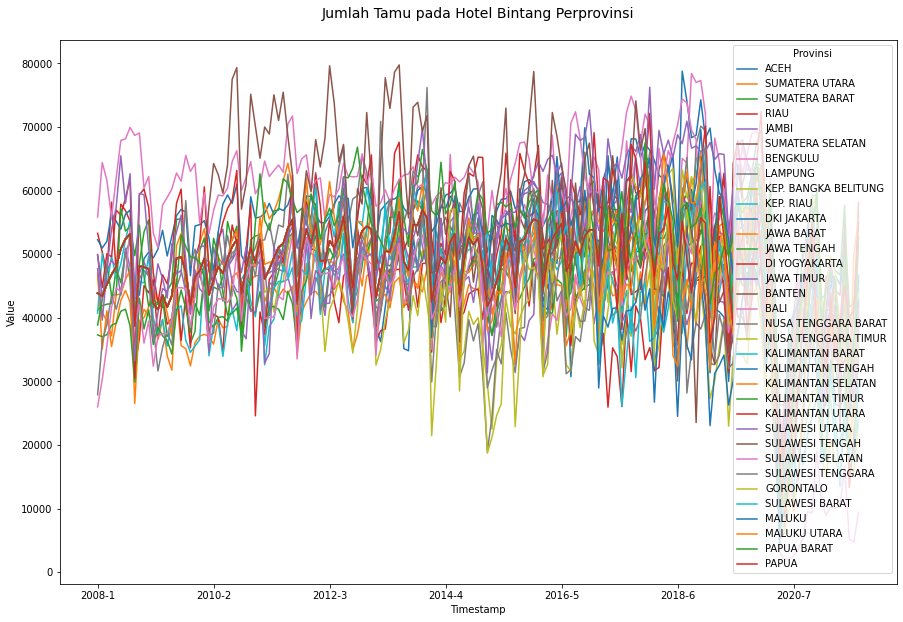

In [47]:
# transpose data sehingga membentuk visualisasi timeseries

data_trans.plot(figsize=(15,10))
plt.title('Jumlah Tamu pada Hotel Bintang Perprovinsi\n', size=14)
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.show()

Melihat nilai rata-rata jumlah tamu dari tahun 2008 - 2021 per-provinsi

In [48]:
data_trans.describe()

Provinsi,ACEH,SUMATERA UTARA,SUMATERA BARAT,RIAU,JAMBI,SUMATERA SELATAN,BENGKULU,LAMPUNG,KEP. BANGKA BELITUNG,KEP. RIAU,...,SULAWESI UTARA,SULAWESI TENGAH,SULAWESI SELATAN,SULAWESI TENGGARA,GORONTALO,SULAWESI BARAT,MALUKU,MALUKU UTARA,PAPUA BARAT,PAPUA
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,44779.472727,42882.787879,48745.387879,44503.636364,44596.109091,49919.715152,51731.024242,51979.309091,39603.812121,44646.060606,...,52965.624242,54145.030303,44212.848485,43304.254545,45311.630303,45406.939394,45474.393939,47277.121212,48973.060606,48257.969697
std,9952.430850,7210.991068,9371.698082,7084.707689,6957.037210,7032.748606,10468.128376,9275.461762,9547.825873,10456.700891,...,11262.496469,13733.425393,7026.827842,9181.707468,9551.276391,9883.782836,7996.261785,8737.218028,7651.287256,7623.731170
min,8750.000000,11930.000000,9090.000000,14730.000000,15680.000000,18940.000000,13980.000000,13940.000000,15060.000000,9910.000000,...,13980.000000,9490.000000,18980.000000,10480.000000,6140.000000,4640.000000,4400.000000,9500.000000,10730.000000,17160.000000
25%,41460.000000,39100.000000,42680.000000,40170.000000,41120.000000,46125.000000,46802.000000,47210.000000,34920.000000,40350.000000,...,44770.000000,45297.000000,40650.000000,37940.000000,42290.000000,42590.000000,41818.000000,43609.000000,46125.000000,44749.000000
50%,47440.000000,43810.000000,50220.000000,45570.000000,45120.000000,49449.000000,51180.000000,52310.000000,41860.000000,47340.000000,...,52930.000000,54440.000000,44730.000000,44270.000000,47690.000000,47982.000000,46993.000000,48946.000000,49595.000000,49318.000000
75%,51058.000000,46670.000000,55210.000000,49110.000000,48710.000000,54074.000000,56810.000000,58090.000000,46462.000000,50860.000000,...,62540.000000,64040.000000,49100.000000,49595.000000,51510.000000,51671.000000,51280.000000,52480.000000,53220.000000,52800.000000
max,60180.000000,59530.000000,65349.000000,59120.000000,61340.000000,65850.000000,78420.000000,76200.000000,59030.000000,65630.000000,...,76260.000000,79770.000000,56550.000000,67160.000000,59770.000000,61370.000000,56986.000000,63980.000000,67560.000000,67250.000000


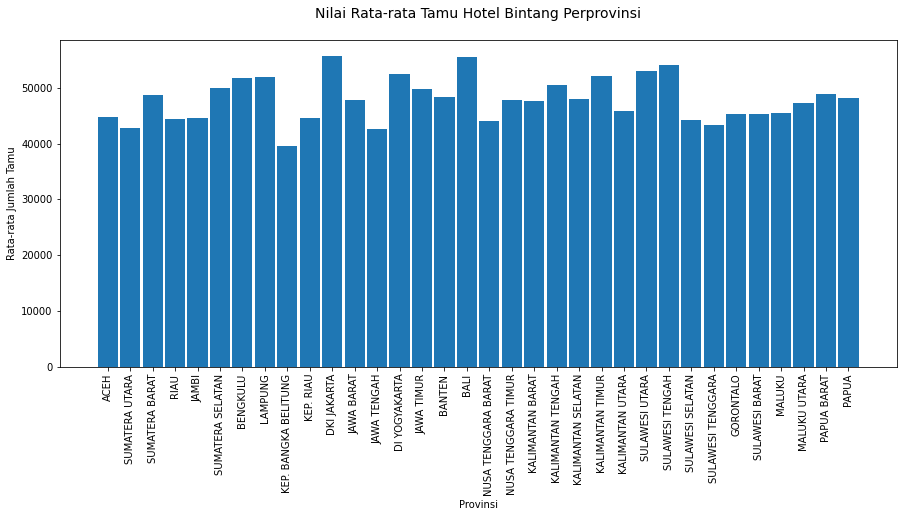

In [49]:
x = []
y = []

for i in data_trans.columns:
    x.append(i)
    y.append(data_trans[i].mean(axis=0))

plt.figure(figsize=(15,6))
plt.bar(x,y, width=0.9)
plt.title('Nilai Rata-rata Tamu Hotel Bintang Perprovinsi\n', size=14)
plt.xlabel('Provinsi')
plt.ylabel('Rata-rata Jumlah Tamu')
plt.xticks(rotation=90)
plt.show()

## Kesimpulan

Berdasarkan visualisasi diatas didapatkan bahwa DKI Jakarta, Bali, dan Sulawesi Tengah merupakan provinsi dengan rata-rata jumlah tamu tertinggi dari range waktu 2018-2021.

Dengan asumsi bahwa Provinsi DKI Jakarta merupakan ibu kota serta kota metropolitan dimana banyak wisatawan maupun tamu-tamu penting berdatangan dan tinggal, maka kami akan menggunakan data tamu hotel bintang dari provinsi DKI Jakarta sebagai data pemodelan

Slicing data provinsi DKI Jakarta

In [50]:
def slicedata(data, prov):
    df = data.loc[['{0}'.format(prov)]]
    df.reset_index(inplace=True)
    df = df.T
    df.drop('Provinsi', axis=0, inplace=True)
    df.reset_index(inplace=True)
    df.columns = ['dt', 'value']
    df['value'] = df['value'].astype('int')
    df['dt'] = pd.to_datetime(df['dt'], format='%Y-%m')
    df = df.sort_values(by=['dt'])
    
    return df

In [51]:
# Slice data provinsi DKI Jakarta
JakartaHotel = slicedata(df_tamu, 'DKI JAKARTA')
JakartaHotel

,dt,value
0,2008-01-01,52290
1,2008-02-01,50980
2,2008-03-01,52030
3,2008-04-01,56410
4,2008-05-01,55200
...,...,...
160,2021-05-01,45230
161,2021-06-01,51900
162,2021-07-01,31720
163,2021-08-01,30800


Setelah di slicing, selanjunya kita akan menyimpan dataframe tersebut menjadi dataset fisik

In [52]:
# JakartaHotel.to_csv('data/JakartaHotel.csv', encoding='utf-8')

print('Dataset telah disimpan')

Dataset telah disimpan
